In [1]:
MAX_DEPTH = 6
MIN_SAMPLES = 100
CUTOFF = 8804

In [2]:
import json
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import pandas as pd
import json

with open('test_data_1hour_sq_FEB.json', 'r', encoding='UTF-8') as f:
    first_data = json.load(f)

COL = ['name',
 'code',
 'time',
 'price',
 'time_1',
 'price_1',
 'price_dif_1',
 'sell_1',
 'buy_1',
 'volume_1',
 'variation_1',
 'post_num_1',
 'unique_id_1',
 'click_1',
 'like_1',
 'dislike_1',
 'time_2',
 'price_2',
 'price_dif_2',
 'sell_2',
 'buy_2',
 'volume_2',
 'variation_2',
 'post_num_2',
 'unique_id_2',
 'click_2',
 'like_2',
 'dislike_2',
 'time_3',
 'price_3',
 'price_dif_3',
 'sell_3',
 'buy_3',
 'volume_3',
 'variation_3',
 'post_num_3',
 'unique_id_3',
 'click_3',
 'like_3',
 'dislike_3',
 'mkt_cap',
 'kospi',
 'kosdaq',
 'trash',
 'yesterday_closing_price',
 'is_maximum',
 'is_minimum',
 'price_volatility',
 'price_trend',
 'average_price_volatility',
 'sell_minus_buy_1',
 'sell_minus_buy_2',
 'sell_minus_buy_3',
 'is_price_gap_stable',
 'price_gap_volatility',
 'is_like_higher',
 'volume_trend',
 'post_num_trend',
 'unique_id_trend',
 'click_trend',
 'price_increase',
 'did_price_increase',
 'did_price_033',
 'did_price_100',
 'did_price_150',
 'kospi_ind',
 'kosdaq_ind',
 'time_slot',
 'ko_inter',
 'early_mor',
 'morning',
 'lunch',
 'afternoon',
 'late',
 'mkt_change',
 'alpha',
 'per_now',
 'did_opening_price_increase',
 'price_sq',
 'price_1_sq',
 'price_dif_1_sq',
 'sell_1_sq',
 'buy_1_sq',
 'volume_1_sq',
 'variation_1_sq',
 'post_num_1_sq',
 'unique_id_1_sq',
 'click_1_sq',
 'like_1_sq',
 'dislike_1_sq',
 'price_2_sq',
 'price_dif_2_sq',
 'sell_2_sq',
 'buy_2_sq',
 'volume_2_sq',
 'variation_2_sq',
 'post_num_2_sq',
 'unique_id_2_sq',
 'click_2_sq',
 'like_2_sq',
 'dislike_2_sq',
 'price_3_sq',
 'price_dif_3_sq',
 'sell_3_sq',
 'buy_3_sq',
 'volume_3_sq',
 'variation_3_sq',
 'post_num_3_sq',
 'unique_id_3_sq',
 'click_3_sq',
 'like_3_sq',
 'dislike_3_sq',
 'mkt_cap_sq',
 'kospi_sq',
 'kosdaq_sq',
 'trash_sq',
 'yesterday_closing_price_sq',
 'is_maximum_sq',
 'is_minimum_sq',
 'price_volatility_sq',
 'price_trend_sq',
 'average_price_volatility_sq',
 'sell_minus_buy_1_sq',
 'sell_minus_buy_2_sq',
 'sell_minus_buy_3_sq',
 'is_price_gap_stable_sq',
 'price_gap_volatility_sq',
 'is_like_higher_sq',
 'volume_trend_sq',
 'post_num_trend_sq',
 'unique_id_trend_sq',
 'click_trend_sq',
 'price_increase_sq',
 'did_price_increase_sq',
 'did_price_033_sq',
 'did_price_100_sq',
 'did_price_150_sq',
 'kospi_ind_sq',
 'kosdaq_ind_sq',
 'time_slot_sq',
 'early_mor_sq',
 'morning_sq',
 'lunch_sq',
 'afternoon_sq',
 'late_sq',
 'mkt_change_sq',
 'alpha_sq',
 'per_now_sq',
 'did_opening_price_increase_sq']

df1 = pd.DataFrame(first_data, columns=COL)
df1 = df1.dropna(axis=0, how='any')

In [4]:
with open('test_data_1hour_sq_MAR.json', 'r', encoding='UTF-8') as f:
    second_data = json.load(f)

df2 = pd.DataFrame(second_data, columns=COL)
df2 = df2.dropna(axis=0, how='any')

In [5]:
df = pd.concat([df1, df2])

In [6]:
X = ['price_1',
 'price_dif_1',
 'sell_1',
 'buy_1',
 'volume_1',
 'variation_1',
 'post_num_1',
 'unique_id_1',
 'click_1',
 'like_1',
 'dislike_1',
 'price_2',
 'price_dif_2',
 'sell_2',
 'buy_2',
 'volume_2',
 'variation_2',
 'post_num_2',
 'unique_id_2',
 'click_2',
 'like_2',
 'dislike_2',
 'price_3',
 'price_dif_3',
 'sell_3',
 'buy_3',
 'volume_3',
 'variation_3',
 'post_num_3',
 'unique_id_3',
 'click_3',
 'like_3',
 'dislike_3',
 'mkt_cap',
 'kospi',
 'kosdaq',
 'trash',
 'yesterday_closing_price',
 'is_maximum',
 'is_minimum',
 'price_volatility',
 'price_trend',
 'average_price_volatility',
 'sell_minus_buy_1',
 'sell_minus_buy_2',
 'sell_minus_buy_3',
 'is_price_gap_stable',
 'price_gap_volatility',
 'is_like_higher',
 'volume_trend',
 'post_num_trend',
 'unique_id_trend',
 'click_trend',
 'kospi_ind',
 'kosdaq_ind',
 'time_slot',
 'ko_inter',
 'early_mor',
 'morning',
 'lunch',
 'afternoon',
 'late',
 'mkt_change',
 'alpha',
 'per_now',
 'did_opening_price_increase',
 'price_1_sq',
 'price_dif_1_sq',
 'sell_1_sq',
 'buy_1_sq',
 'volume_1_sq',
 'variation_1_sq',
 'post_num_1_sq',
 'unique_id_1_sq',
 'click_1_sq',
 'like_1_sq',
 'dislike_1_sq',
 'price_2_sq',
 'price_dif_2_sq',
 'sell_2_sq',
 'buy_2_sq',
 'volume_2_sq',
 'variation_2_sq',
 'post_num_2_sq',
 'unique_id_2_sq',
 'click_2_sq',
 'like_2_sq',
 'dislike_2_sq',
 'price_3_sq',
 'price_dif_3_sq',
 'sell_3_sq',
 'buy_3_sq',
 'volume_3_sq',
 'variation_3_sq',
 'post_num_3_sq',
 'unique_id_3_sq',
 'click_3_sq',
 'like_3_sq',
 'dislike_3_sq',
 'mkt_cap_sq',
 'kospi_sq',
 'kosdaq_sq',
 'trash_sq',
 'yesterday_closing_price_sq',
 'is_maximum_sq',
 'is_minimum_sq',
 'price_volatility_sq',
 'price_trend_sq',
 'average_price_volatility_sq',
 'sell_minus_buy_1_sq',
 'sell_minus_buy_2_sq',
 'sell_minus_buy_3_sq',
 'is_price_gap_stable_sq',
 'price_gap_volatility_sq',
 'is_like_higher_sq',
 'volume_trend_sq',
 'post_num_trend_sq',
 'unique_id_trend_sq',
 'click_trend_sq',
 'kospi_ind_sq',
 'kosdaq_ind_sq',
 'time_slot_sq',
 'early_mor_sq',
 'morning_sq',
 'lunch_sq',
 'afternoon_sq',
 'late_sq',
 'mkt_change_sq',
 'alpha_sq',
 'per_now_sq',
 'did_opening_price_increase_sq']

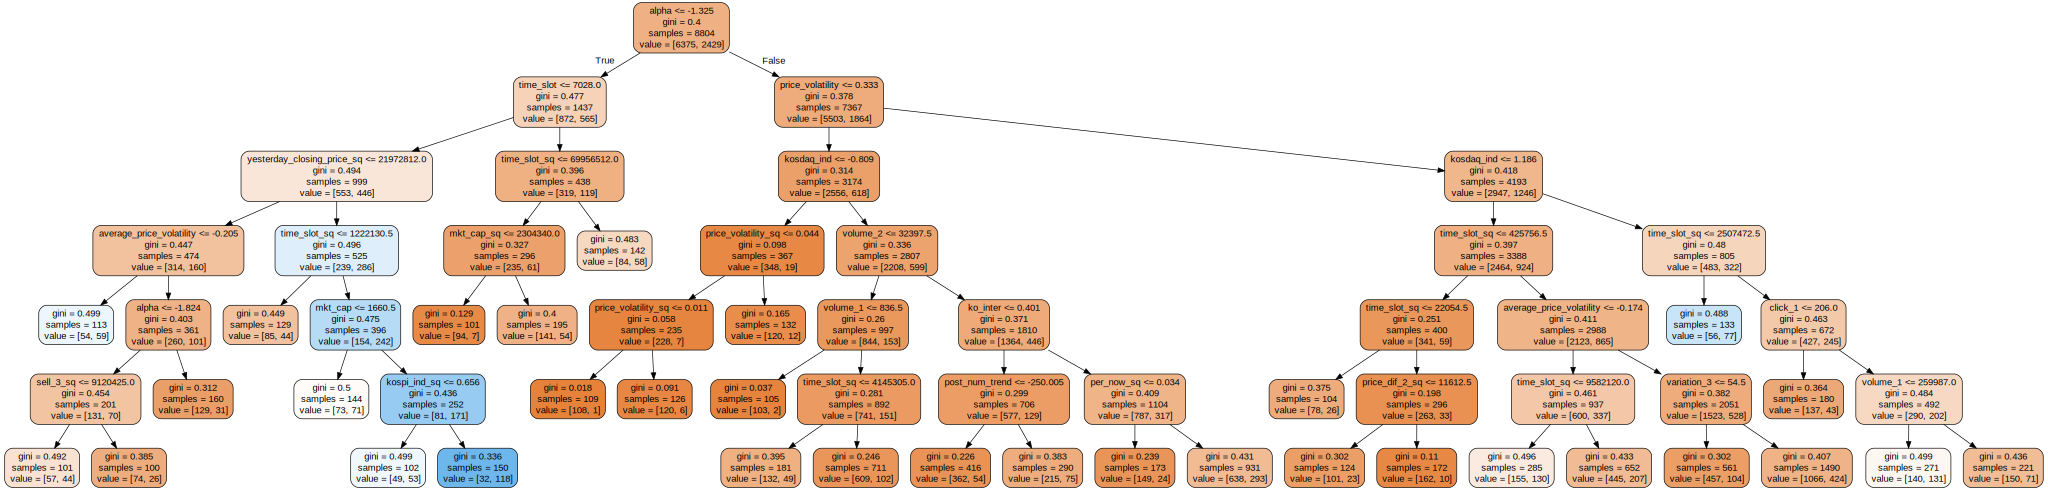

In [7]:
X_train = df[X][:CUTOFF].as_matrix()

y_train = df[["did_price_033"]][:CUTOFF].as_matrix()

X_test = df[X][CUTOFF:].as_matrix()

y_test = df[["did_price_033"]][CUTOFF:].as_matrix()

df_tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, min_samples_leaf=MIN_SAMPLES)
df_tree.fit(X_train, y_train)

df_tree_viz = export_graphviz(
    df_tree,
    out_file=None,
    feature_names=X,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(df_tree_viz)
#graph.render('df_tree_viz')
graph

In [8]:
y_pred = df_tree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE:', MSE)

MSE: 0.25064808814


In [9]:
y_pred_df = pd.DataFrame(y_pred)
y_test_df = pd.DataFrame(y_test)
compare = pd.concat([y_pred_df, y_test_df], axis=1)
compare.columns = ["y_pred", "y_test"]

In [10]:
df[(((df["time"].str.startswith("2018-02-21"))) | (df["time"].str.startswith("2018-02-22")) \
    | (df["time"].str.startswith("2018-02-23"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= -0) \
  & (df["alpha"] <= -1) & (df["variation_2_sq"] <= 200)]["did_price_033"].mean()

0.5882352941176471

In [11]:
df[(((df["time"].str.startswith("2018-02-21"))) | (df["time"].str.startswith("2018-02-22")) \
    | (df["time"].str.startswith("2018-02-23"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= -0) \
  & (df["alpha"] <= -1) & (df["variation_2_sq"] <= 200)]["price_increase"].mean()

0.5493179516102941

In [12]:
df[(((df["time"].str.startswith("2018-02-26"))) | (df["time"].str.startswith("2018-02-27")) \
    | (df["time"].str.startswith("2018-02-28"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["did_price_033"].mean()

0.375

In [13]:
df[(((df["time"].str.startswith("2018-02-26"))) | (df["time"].str.startswith("2018-02-27")) \
    | (df["time"].str.startswith("2018-02-28"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["price_increase"].mean()

0.442456109034375

In [14]:
df[(((df["time"].str.startswith("2018-02-14"))) | (df["time"].str.startswith("2018-02-20")) \
    | (df["time"].str.startswith("2018-03-02"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["did_price_033"].mean()

0.639344262295082

In [15]:
df[(((df["time"].str.startswith("2018-02-14"))) | (df["time"].str.startswith("2018-02-20")) \
    | (df["time"].str.startswith("2018-03-02"))) & (df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["price_increase"].mean()

0.4923078970950821

In [16]:
df[(df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["did_price_033"].mean()

0.5652173913043478

In [17]:
df[(df["price_volatility_sq"] > 0.25) \
  & (df["average_price_volatility"] <= 0) \
  & (df["alpha"] < -1) & (df["variation_2_sq"] <= 200)]["price_increase"].mean()

0.5064782479590065